In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
#Importing Libraries

In [ ]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df.head()
# Reading the data and viewing the first five rows.


In [ ]:
df.info()
#Information of the Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.describe()
#Description of the Data Frame

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.isna().sum()
#Checking if any missing values avialable in Data.
#There are missing values in (N_BEDROOM(1), N_BATHROOM(5),QS_OVERALL (48)). 

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df['N_BEDROOM'].fillna(float(df['N_BEDROOM'].mode(0)),inplace= True)
df['N_BATHROOM'].fillna(float(df['N_BATHROOM'].mode(0)), inplace = True)
df['QS_OVERALL'].fillna(float(df['QS_OVERALL'].mode(0)), inplace = True)
#Replace the missing values for numerical columns with mean(QS_OVERALL) and mode(N_BEDROOM, N_BATHROOM).
#The mode is used for N_BEDROOM, N_BATHROOM because the values can be integer only for this data set.
#The Mean is used for QS_OVERALL.


In [ ]:
df[['N_BEDROOM']] = df[['N_BEDROOM']].astype(int)
df[['N_BATHROOM']] = df[['N_BATHROOM']].astype(int)
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
#Converting the datatypes to int and datetime.

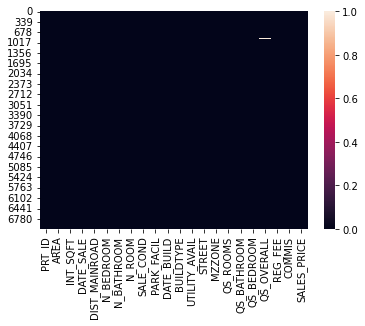

In [ ]:
df.isna().sum()
sns.heatmap(df.isnull(), cbar=True)
#There are no missing values verified.

In [ ]:
df.info()
#Checking if the datatype are changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   object        
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,2014-11-09,36,2,1,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,2007-05-04,137,1,1,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,2006-03-13,176,3,2,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,2011-06-04,175,1,1,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,2006-06-22,74,2,1,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   object        
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df.AREA.value_counts()
#Checking the data in AREA Column few Values there are spelling mistakes and that needs to be cleaned.


Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar','Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar'}
df.AREA = df.AREA.replace(area)
#Cleaning the Values.

In [ ]:
df.AREA.value_counts()
#Checking if the Data Cleaned.

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [ ]:
df.SALE_COND.value_counts()
#Checking the data in SALE_COND Column few Values there are spelling mistakes and that needs to be cleaned.

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
cond = {'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}
df.SALE_COND = df.SALE_COND.replace(cond)
#Cleaning the Values.

In [ ]:
df.SALE_COND.value_counts()
#Checking if the Data Cleaned.

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
df.PARK_FACIL.value_counts()
#Checking the data in PARK_FACIL Column few Values there are spelling mistakes and that needs to be cleaned.

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
park = {'Noo':'No'}
df.PARK_FACIL = df.PARK_FACIL.replace(park)
#Cleaning the Values.

In [ ]:
df.PARK_FACIL.value_counts()
#Checking if the Data Cleaned.


Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [ ]:
df.BUILDTYPE.value_counts()
#Checking the data in BUILDTYPE Column few Values there are spelling mistakes and that needs to be cleaned.

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
df.BUILDTYPE = df.BUILDTYPE.replace({'Comercial':'Commercial','Other':'Others'})
#Cleaning the Values.

In [ ]:
df.BUILDTYPE.value_counts()
#Checking if the Data Cleaned.

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [ ]:
df.STREET.value_counts()
#Checking the data in STREET Column few Values there are spelling mistakes and that needs to be cleaned.

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
df.STREET = df.STREET.replace({'NoAccess':'No Access','Pavd':'Paved'})
#Cleaning the Values.

In [ ]:
df.STREET.value_counts()
#Checking if the Data Cleaned.

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [ ]:
df.MZZONE.value_counts()
#Checking the data in MZZONE and the data is Clean .

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [ ]:
df.UTILITY_AVAIL.value_counts()
#Checking the data in UTILITY_AVAIL Column few Values there are spelling mistakes and that needs to be cleaned.

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(['AllPub','NoSewr ','NoSewr'],['All Pub','NoSeWa','NoSeWa'])
#Cleaning the Values.

In [ ]:
df.UTILITY_AVAIL.value_counts()
#Checking if the Data Cleaned.

NoSeWa     3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,All Pub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,All Pub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


**Exploratory data analysis**

Plotting the Categorical Column

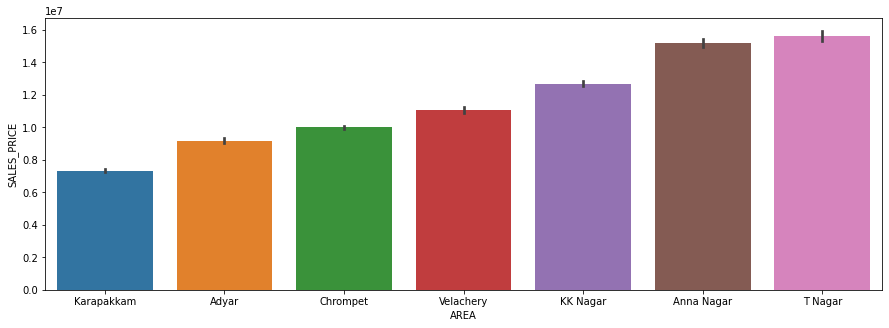

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])


**There is a relationship between AREA and SALESPRICE.Depends on the AREA SALESPRICE for Particular AREA increases.
Linear relationship between the AREA and SALESPRICE.**

In [ ]:
df.groupby('AREA')['SALES_PRICE'].agg([('vals','mean')]).sort_values( by = 'vals')

,vals
AREA,
Karapakkam,7.340100e+06
Adyar,9.185668e+06
Chrompet,1.001381e+07
Velachery,1.104735e+07
KK Nagar,1.269623e+07
Anna Nagar,1.516820e+07
T Nagar,1.561674e+07


In [ ]:
df['AREA']= df['AREA'].replace({
    'Karapakkam':0,
    'Adyar':1,
    'Chrompet':2,
    'Velachery':3,
    'KK Nagar':4,
    'Anna Nagar':5,
    'T Nagar':6,
})
#Labeling the data to numeric Values

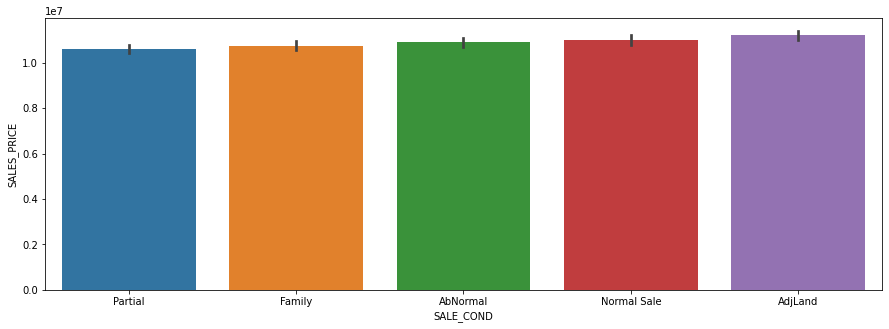

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

**There is a slight relationship between SALE_COND and SALESPRICE. Linear relationship between the AREA and SALESPRICE.**

In [ ]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,SALE_COND,SALES_PRICE
4,Partial,1.061637e+07
2,Family,1.073642e+07
0,AbNormal,1.091463e+07
3,Normal Sale,1.099418e+07
1,AdjLand,1.120931e+07


In [ ]:
df['SALE_COND']= df['SALE_COND'].replace({
    'Partial':0,
    'Family':1,
    'AbNormal':2,
    'Normal Sale':3,
    'AdjLand':4
})
#Labeling the data to numeric Values

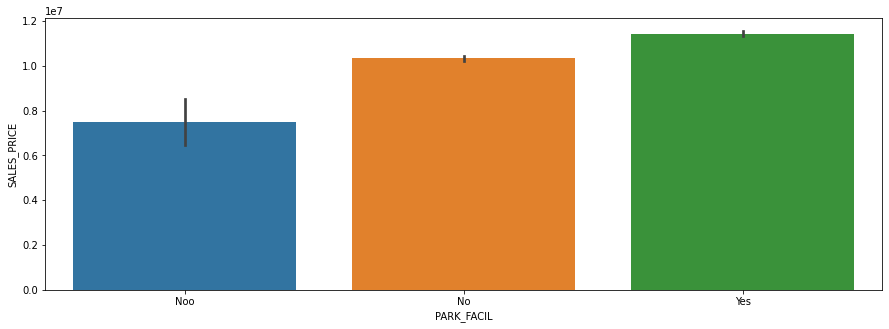

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

**We can Relationship between Parking_Fac and Sales_Price. If Parking Space available for house then the price of house is also high**

In [ ]:
df['PARK_FACIL']= df['PARK_FACIL'].replace({
    'No':0,
    'Yes':1
})
#Labeling the data to numeric Values

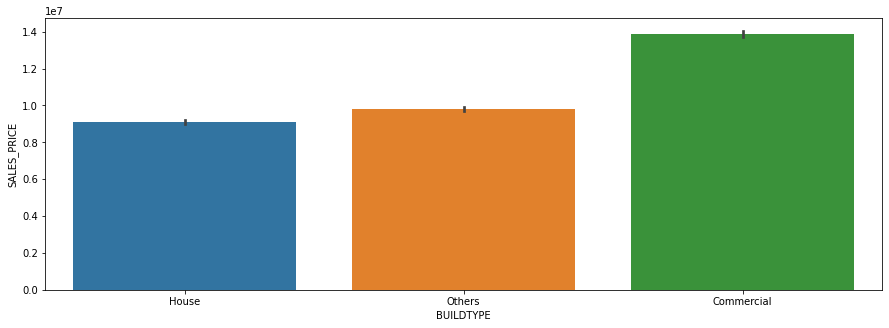

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

**There is relationship between Buildtype and Salesprice**

In [ ]:
build_type=pd.get_dummies(df['BUILDTYPE'],drop_first=True)
#One Hot Encoding

In [ ]:
build_type

,House,Others
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
7104,0,1
7105,0,1
7106,1,0
7107,0,0


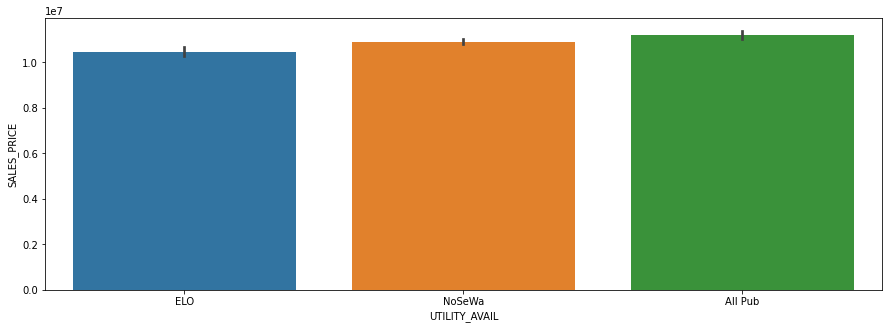

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

**There is Relation between Utility and Salesprice**

In [ ]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,UTILITY_AVAIL,SALES_PRICE
1,ELO,1.046941e+07
2,NoSeWa,1.090923e+07
0,All Pub,1.121002e+07


In [ ]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].replace({
    'ELO':0,
    'NoSeWa':1,
    'All Pub':2
})
#Labeling the data to numeric Values

In [ ]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,0,1004,2011-04-05,131,1,1,3,2,1,...,2,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,5,1986,2006-12-19,26,2,1,5,2,0,...,2,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,1,909,2012-04-02,70,1,1,3,2,1,...,0,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,3,1855,2010-03-13,14,3,2,5,1,0,...,1,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,0,1226,2009-05-10,84,1,1,3,2,1,...,2,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,0,598,2011-03-01,51,1,1,2,4,0,...,0,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,3,1897,2004-08-04,52,3,2,5,1,1,...,1,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,3,1614,2006-08-25,152,2,1,4,3,0,...,1,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,0,787,2009-03-08,40,1,1,2,0,1,...,0,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


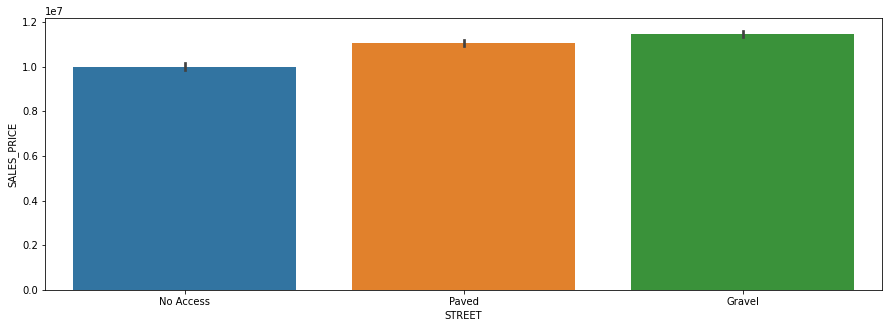

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

**There is Relation between STREET and Salesprice.**


In [ ]:
df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,STREET,SALES_PRICE
1,No Access,1.000074e+07
2,Paved,1.105754e+07
0,Gravel,1.144462e+07


In [ ]:
df['STREET']= df['STREET'].replace({
    'No Access':0,
    'Paved':1,
    'Gravel':2
})
#Labeling the data to numeric Values

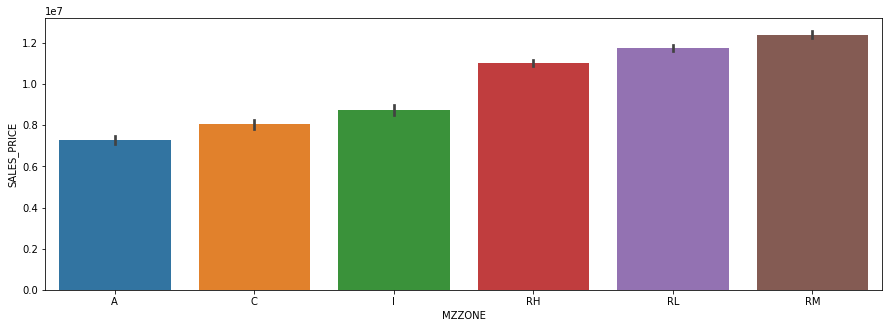

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

In [ ]:
df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('MZZONE')

,MZZONE,SALES_PRICE
0,A,7.292591e+06
1,C,8.052270e+06
2,I,8.738633e+06
3,RH,1.103997e+07
4,RL,1.176576e+07
5,RM,1.240707e+07


In [ ]:
df['MZZONE']= df['MZZONE'].replace({
    'A':0,
    'C':1,
    'I':2,
    'RH':3,
    'RL':4,
    'RM':5
})
#Labeling the data to numeric Values

In [ ]:
df_1= pd.concat([df,build_type],axis=1)

In [ ]:
df_1

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House,Others
0,P03210,0,1004,2011-04-05,131,1,1,3,2,1,...,0,4.0,3.9,4.9,4.330,380000,144400,7600000,0,0
1,P09411,5,1986,2006-12-19,26,2,1,5,2,0,...,3,4.9,4.2,2.5,3.765,760122,304049,21717770,0,0
2,P01812,1,909,2012-04-02,70,1,1,3,2,1,...,4,4.1,3.8,2.2,3.090,421094,92114,13159200,0,0
3,P05346,3,1855,2010-03-13,14,3,2,5,1,0,...,2,4.7,3.9,3.6,4.010,356321,77042,9630290,0,1
4,P06210,0,1226,2009-05-10,84,1,1,3,2,1,...,1,3.0,2.5,4.1,3.290,237000,74063,7406250,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,0,598,2011-03-01,51,1,1,2,4,0,...,5,3.0,2.2,2.4,2.520,208767,107060,5353000,0,1
7105,P10000,3,1897,2004-08-04,52,3,2,5,1,1,...,3,3.6,4.5,3.3,3.920,346191,205551,10818480,0,1
7106,P09594,3,1614,2006-08-25,152,2,1,4,3,0,...,2,4.3,4.2,2.9,3.840,317354,167028,8351410,1,0
7107,P06508,0,787,2009-03-08,40,1,1,2,0,1,...,4,4.6,3.8,4.1,4.160,425350,119098,8507000,0,0


Plotting the Numerical Column

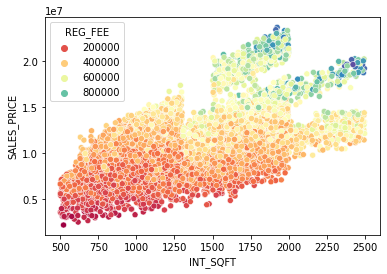

In [ ]:
sns.scatterplot(x=df.INT_SQFT,y=df.SALES_PRICE,hue=df.REG_FEE,palette='Spectral')

**Increase in the Square feet the Registration price increase**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


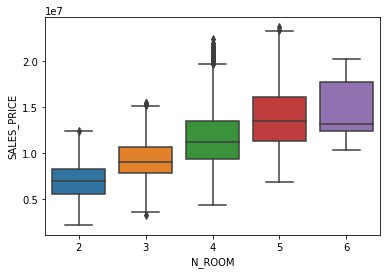

In [ ]:
sns.boxplot(df.N_ROOM,df.SALES_PRICE)

**Salesprice is increased if there is increase in the no of rooms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


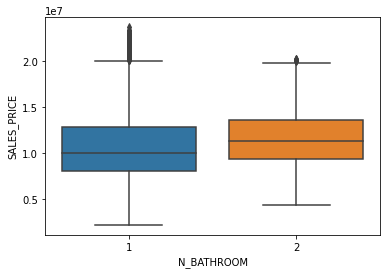

In [ ]:
sns.boxplot(df.N_BATHROOM,df.SALES_PRICE)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


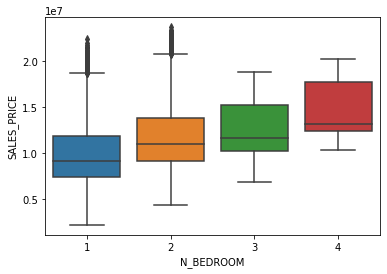

In [ ]:
sns.boxplot(df.N_BEDROOM,df.SALES_PRICE)

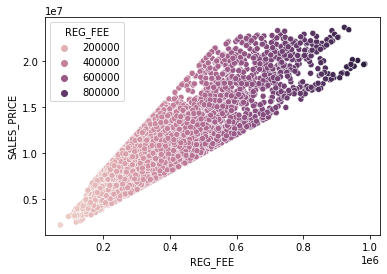

In [ ]:
sns.scatterplot(x=df.REG_FEE ,y=df.SALES_PRICE,hue=df.REG_FEE)

Increase in the Salesprice Registration price also increase

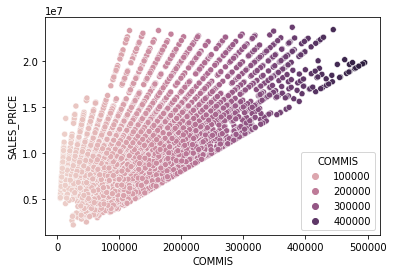

In [ ]:
sns.scatterplot(x=df.COMMIS ,y=df.SALES_PRICE,hue=df.COMMIS)

Increase in the Salesprice Commission price also increase

**Dropping the not required Columns**

In [ ]:
df_1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'House', 'Others'],
      dtype='object')

**Dropping Commis and Reg_fee since it is dependent on the target(sales_price).**

In [ ]:
df_1.drop(['PRT_ID','DATE_BUILD','DATE_SALE','BUILDTYPE','REG_FEE','COMMIS'],axis=1,inplace = True)

In [ ]:
df_1.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,House,Others
0,0,1004,131,1,1,3,2,1,2,1,0,4.0,3.9,4.9,4.330,7600000,0,0
1,5,1986,26,2,1,5,2,0,2,2,3,4.9,4.2,2.5,3.765,21717770,0,0


**Modelling**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,random_state=0,test_size=0.2)

In [ ]:
lr= LinearRegression()
svr=SVR()
spdr=SGDRegressor()
rr=RandomForestRegressor()
xgd=XGBRegressor()
des_tree=DecisionTreeRegressor()

In [ ]:
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
r2_score(y_test,pred)

0.921887170344658

In [ ]:
des_tree.fit(X_train,y_train)
pred=des_tree.predict(X_test)
r2_score(y_test,pred)

0.9581530278576356

In [ ]:
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
r2_score(y_test,pred)

-0.01629682551107514

In [ ]:
xgd.fit(X_train,y_train)
pred=xgd.predict(X_test)
r2_score(y_test,pred)

[05:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9842071688998001

In [ ]:
rr.fit(X_train,y_train)
pred=rr.predict(X_test)
r2_score(y_test,pred)

0.9814106883852987

**Out of all Model RandomForestRegressor(98%) and XGBRegressor Model (98%)  gives the best results. Liner Regression (92%) model can be considered it is simple and easy to understand.**

**Main Features AREA, PARKING FACILITY, BUILD TYPE, UTILITY_AVAIL, INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM**